# Predicting Employment Rates for Fresh College Graduates


## Author: Daniel Hiss, djh126@pitt.edu

## Project Abstract

### Research Question: What majors have the highest likelihood to have employment for college graduates within six months of graduation?

My goal for this research is to explore and present the critical factors affecting employment outcomes for fresh college graduates, and moreso what kind of job is acquired post-graduation. The question is especially interesting to me, as I’m going to be graduating in the Spring of 2025, which means that I need to get a job after college. As a soon-to-be graduate, understanding what employers look for in a potential candidate is extremely useful. I believe that anyone who is going into the workforce could benefit from this project. Still, the aim is for recent graduates (within six months of finishing college) who are looking to gain entry into whatever industry they desire. My goal is to collect datasets from platforms like Kaggle, as well as employment sites like Glassdoor and Indeed. My general plan for analysis is to begin with EDA to check trends and patterns, then clean the data and move on from there, specifics to be determined.

## Exploratory Data Analysis & Data Cleaning

In [49]:
#necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#loading dataset
df = pd.read_csv('recent-grads.csv')

### Missing Data

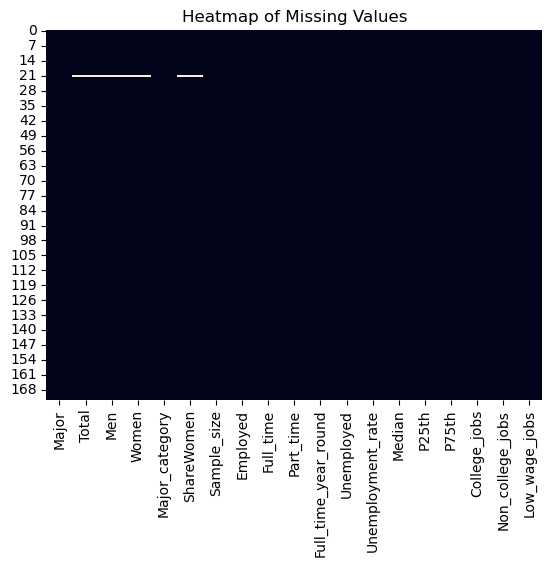

Missing Values Summary:
                      Missing Count  Missing Percentage
Men                               1            0.578035
Women                             1            0.578035
ShareWomen                        1            0.578035
Total                             1            0.578035
Major                             0            0.000000
Unemployment_rate                 0            0.000000
Non_college_jobs                  0            0.000000
College_jobs                      0            0.000000
P75th                             0            0.000000
P25th                             0            0.000000
Median                            0            0.000000
Part_time                         0            0.000000
Unemployed                        0            0.000000
Full_time_year_round              0            0.000000
Full_time                         0            0.000000
Employed                          0            0.000000
Sample_size             

In [45]:
#visualizing missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()

#summarize missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage": missing_percentage
}).sort_values(by="Missing Count", ascending=False)
print("Missing Values Summary:")
print(missing_summary)

#addressing missing values
df_cleaned = df.dropna()
#verify missing values are handled
print("\nRemaining Missing Values After Cleaning:")
print(df_cleaned.isnull().sum())

### Missing Value Justification

Luckily, the dataset chosen was only missing values in one row, for three of the columns. The row that was missing values for the major FOOD SCIENCE, and was missing the total number of people that were in the major, and the division between men and women for those people. Since this was, quite literally, the only row in the dataset that was missing information, I decided to drop it. It won't majorly affect the other predictions, and I have no way of imputing the data, since the other majors varied in both size and gender makeup.

### Outliers

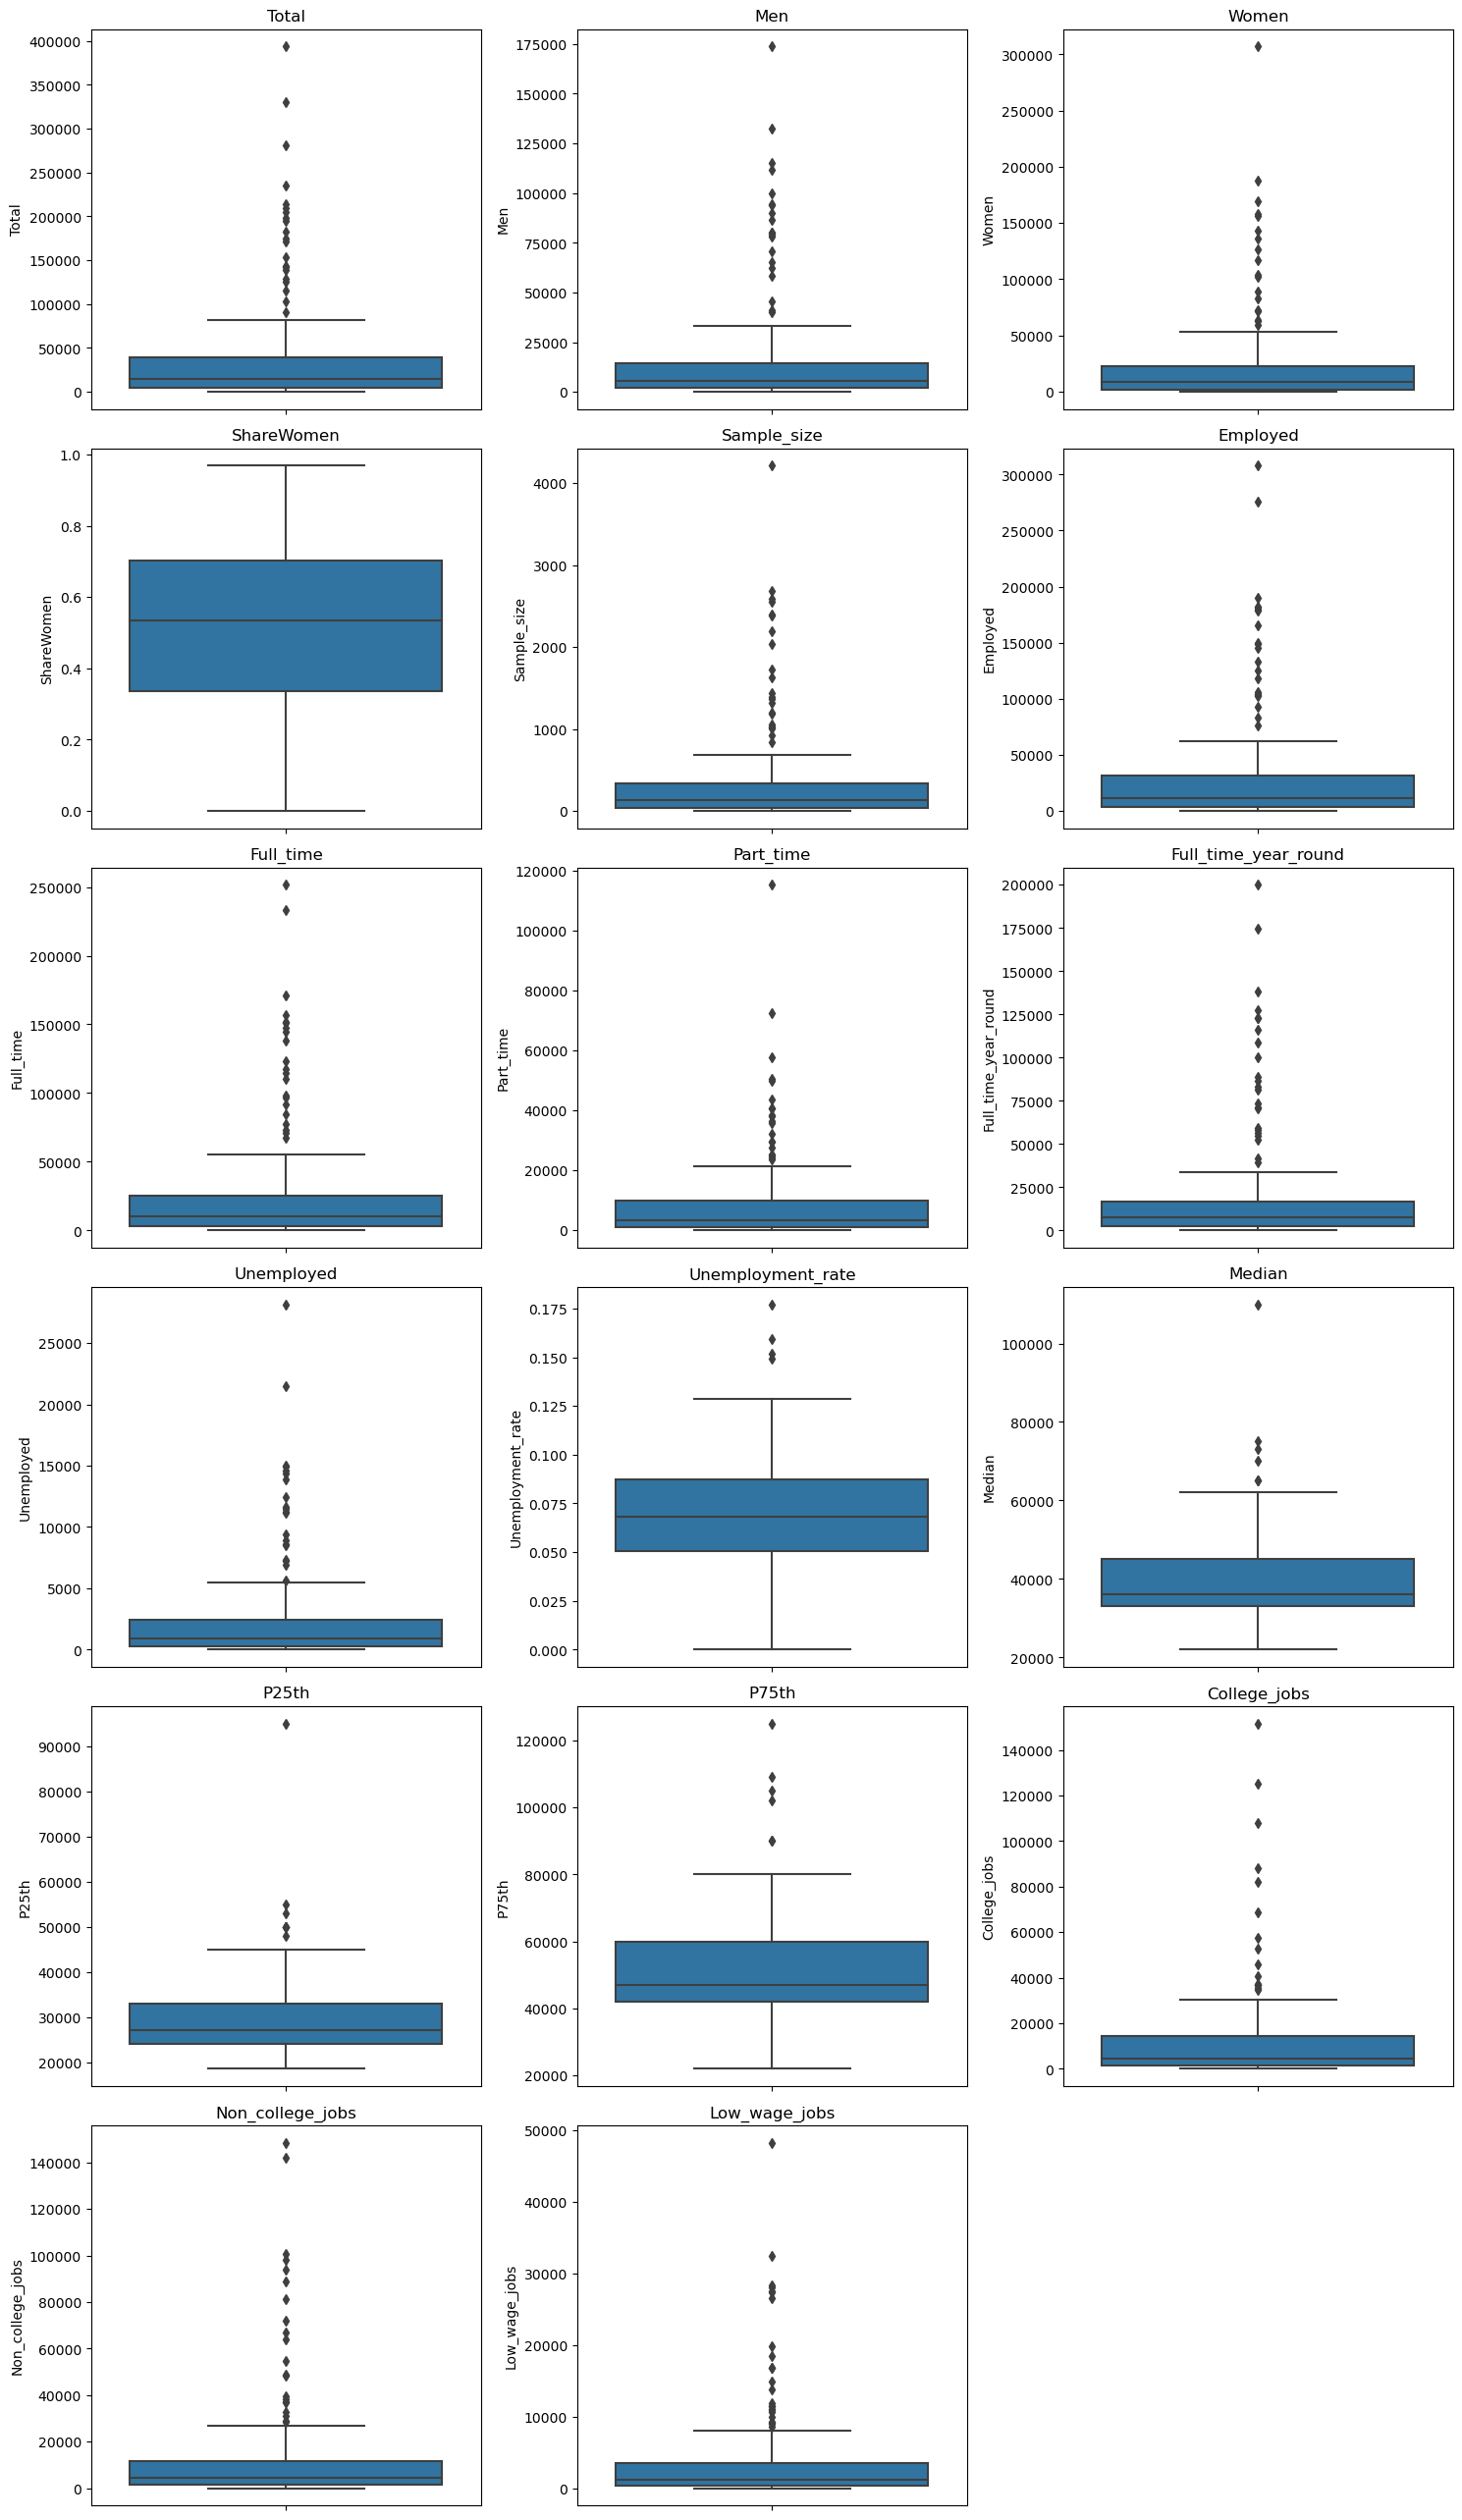

In [46]:
#visualizing outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 30))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Justification for not removing outliers

As we can see above, there's a large number of values that fall outside the IQR. However, I'm choosing to leave these values inside the dataset. In this dataset, we're looking at which majors allow for the highest likelihood of employment following graduation, and as is how the world works, some of the more difficult and niche majors have a higher likelihood of employment within their respective fields, as well as much higher starting salaries. I did try removing the outliers to see what would happen, and nearly 45% of the data was removed. As such, I'm leaving it in.

### Evaluating Distribution

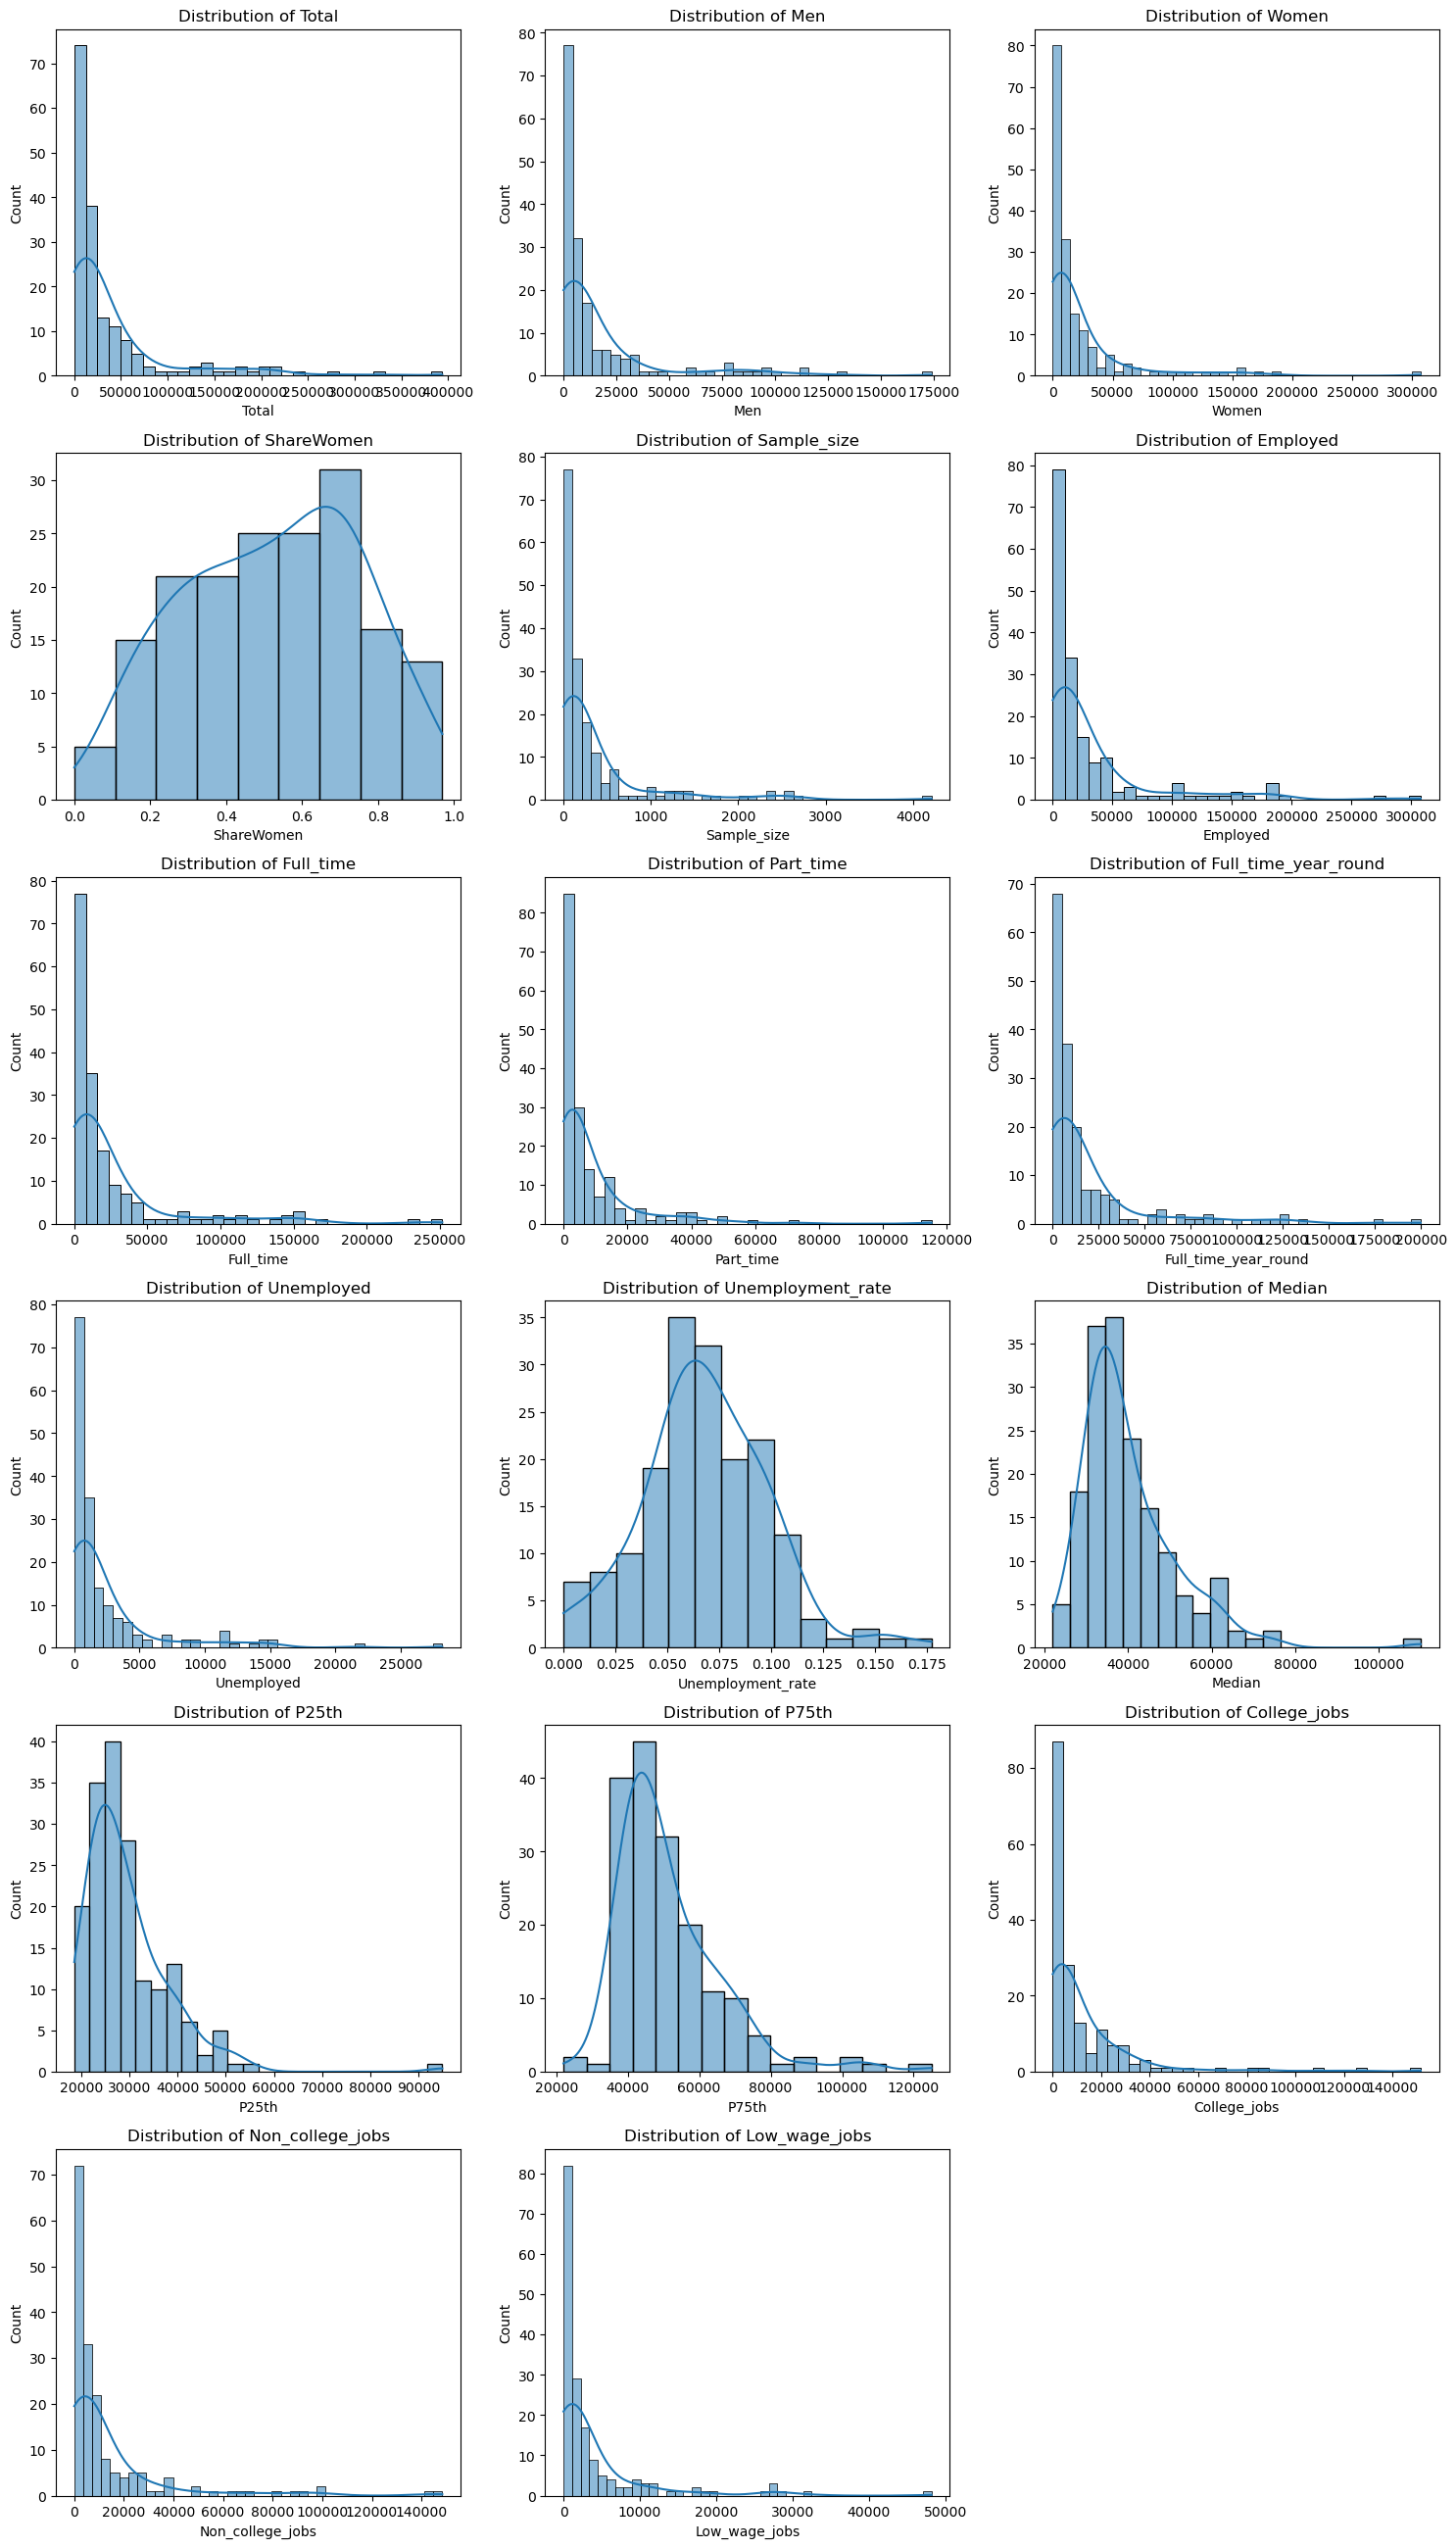

In [47]:
#visualizing distributions
plt.figure(figsize=(15, 30))


for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

As we can see from the above visualizations, the data is very right-skewed (unemployment rate is less so, but still right skewed.) We need to transform it.

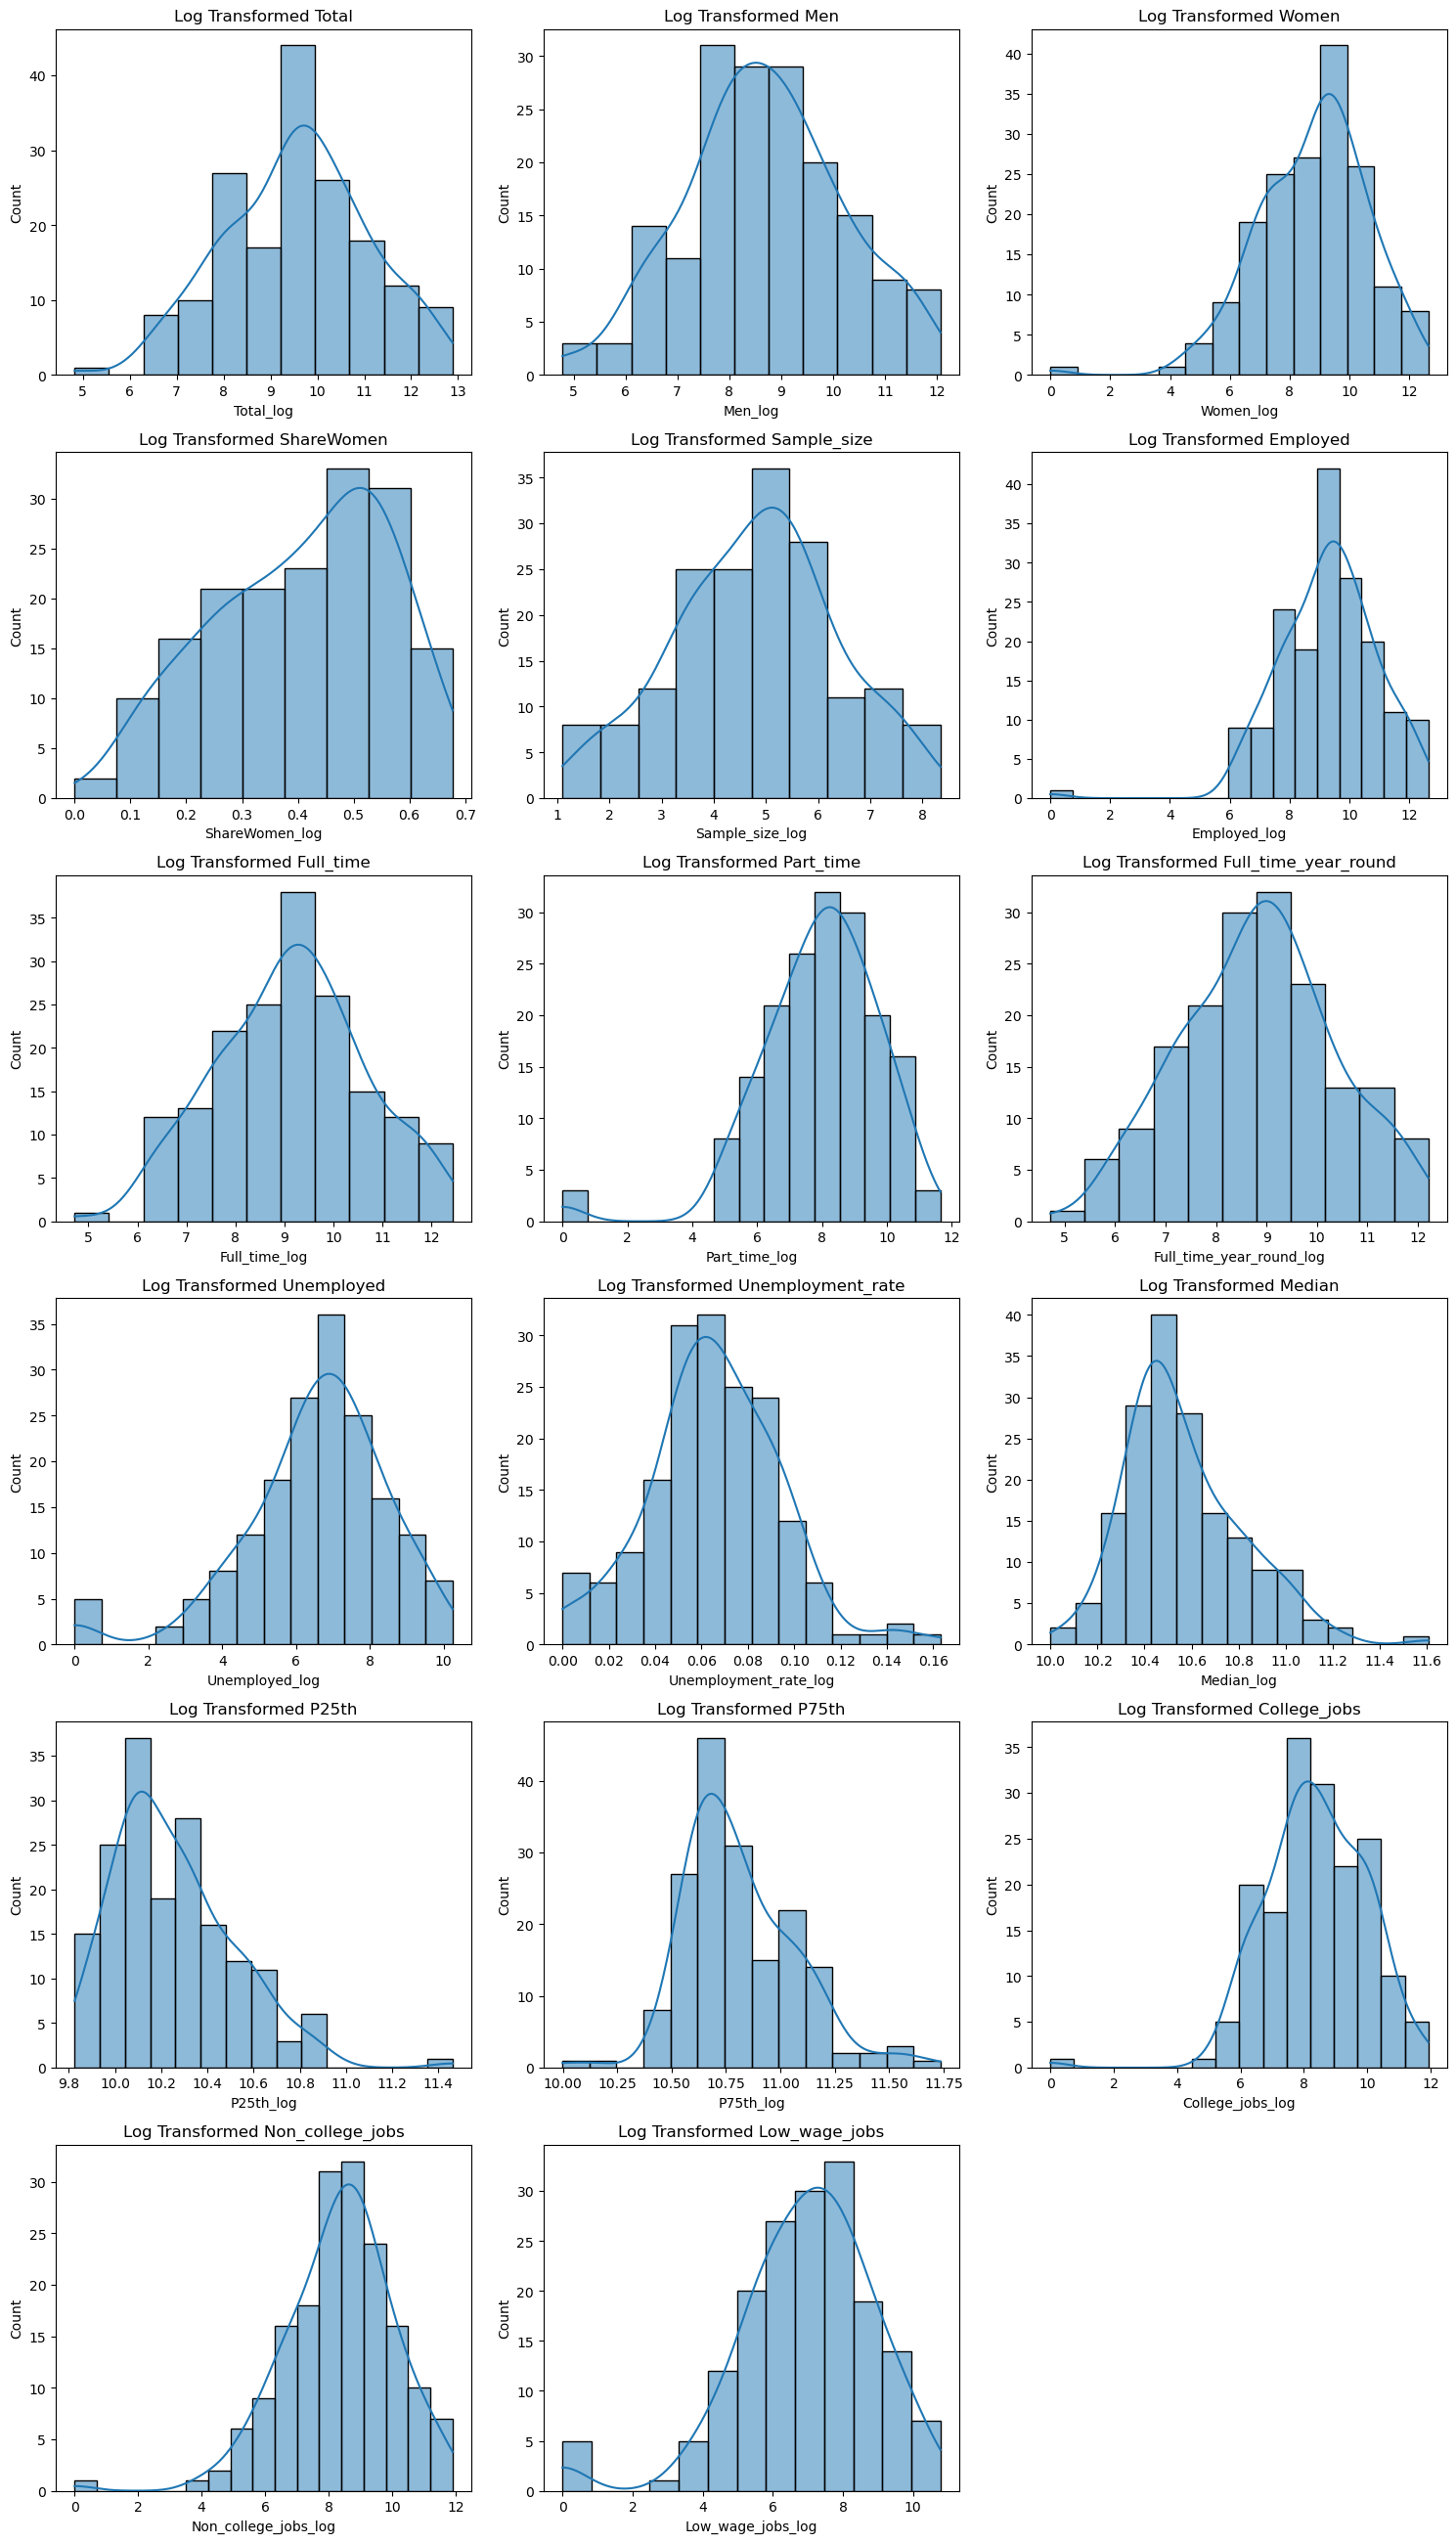

In [53]:
#log transformation
for col in numerical_cols:
        df[f'{col}_log'] = np.log(df[col] + 1)

plt.figure(figsize=(15, 30))

#visualizing transformation to see the difference
for i, col in enumerate(numerical_cols, 1):
    if f'{col}_log' in df.columns:
        plt.subplot(7, 3, i)
        sns.histplot(df[f'{col}_log'], kde=True)
        plt.title(f'Log Transformed {col}')

plt.tight_layout()
plt.show()

### Justification for Transformation

Since we're making a predictive model out of this data, normalization of the data is key. As basically all of the presented statisitics were right-skewed, I believe that normalizing the data made sense. I used log transformation as a way to center the data.

### Scaling of Numeric Variables

In [54]:
#scaling evaluation
scale_stats = df[numerical_cols].describe()
print(scale_stats)

               Total            Men          Women  ShareWomen  Sample_size  \
count     172.000000     172.000000     172.000000  172.000000   173.000000   
mean    39370.081395   16723.406977   22646.674419    0.522223   356.080925   
std     63483.491009   28122.433474   41057.330740    0.231205   618.361022   
min       124.000000     119.000000       0.000000    0.000000     2.000000   
25%      4549.750000    2177.500000    1778.250000    0.336026    39.000000   
50%     15104.000000    5434.000000    8386.500000    0.534024   130.000000   
75%     38909.750000   14631.000000   22553.750000    0.703299   338.000000   
max    393735.000000  173809.000000  307087.000000    0.968954  4212.000000   

            Employed      Full_time      Part_time  Full_time_year_round  \
count     173.000000     173.000000     173.000000            173.000000   
mean    31192.763006   26029.306358    8832.398844          19694.427746   
std     50675.002241   42869.655092   14648.179473          

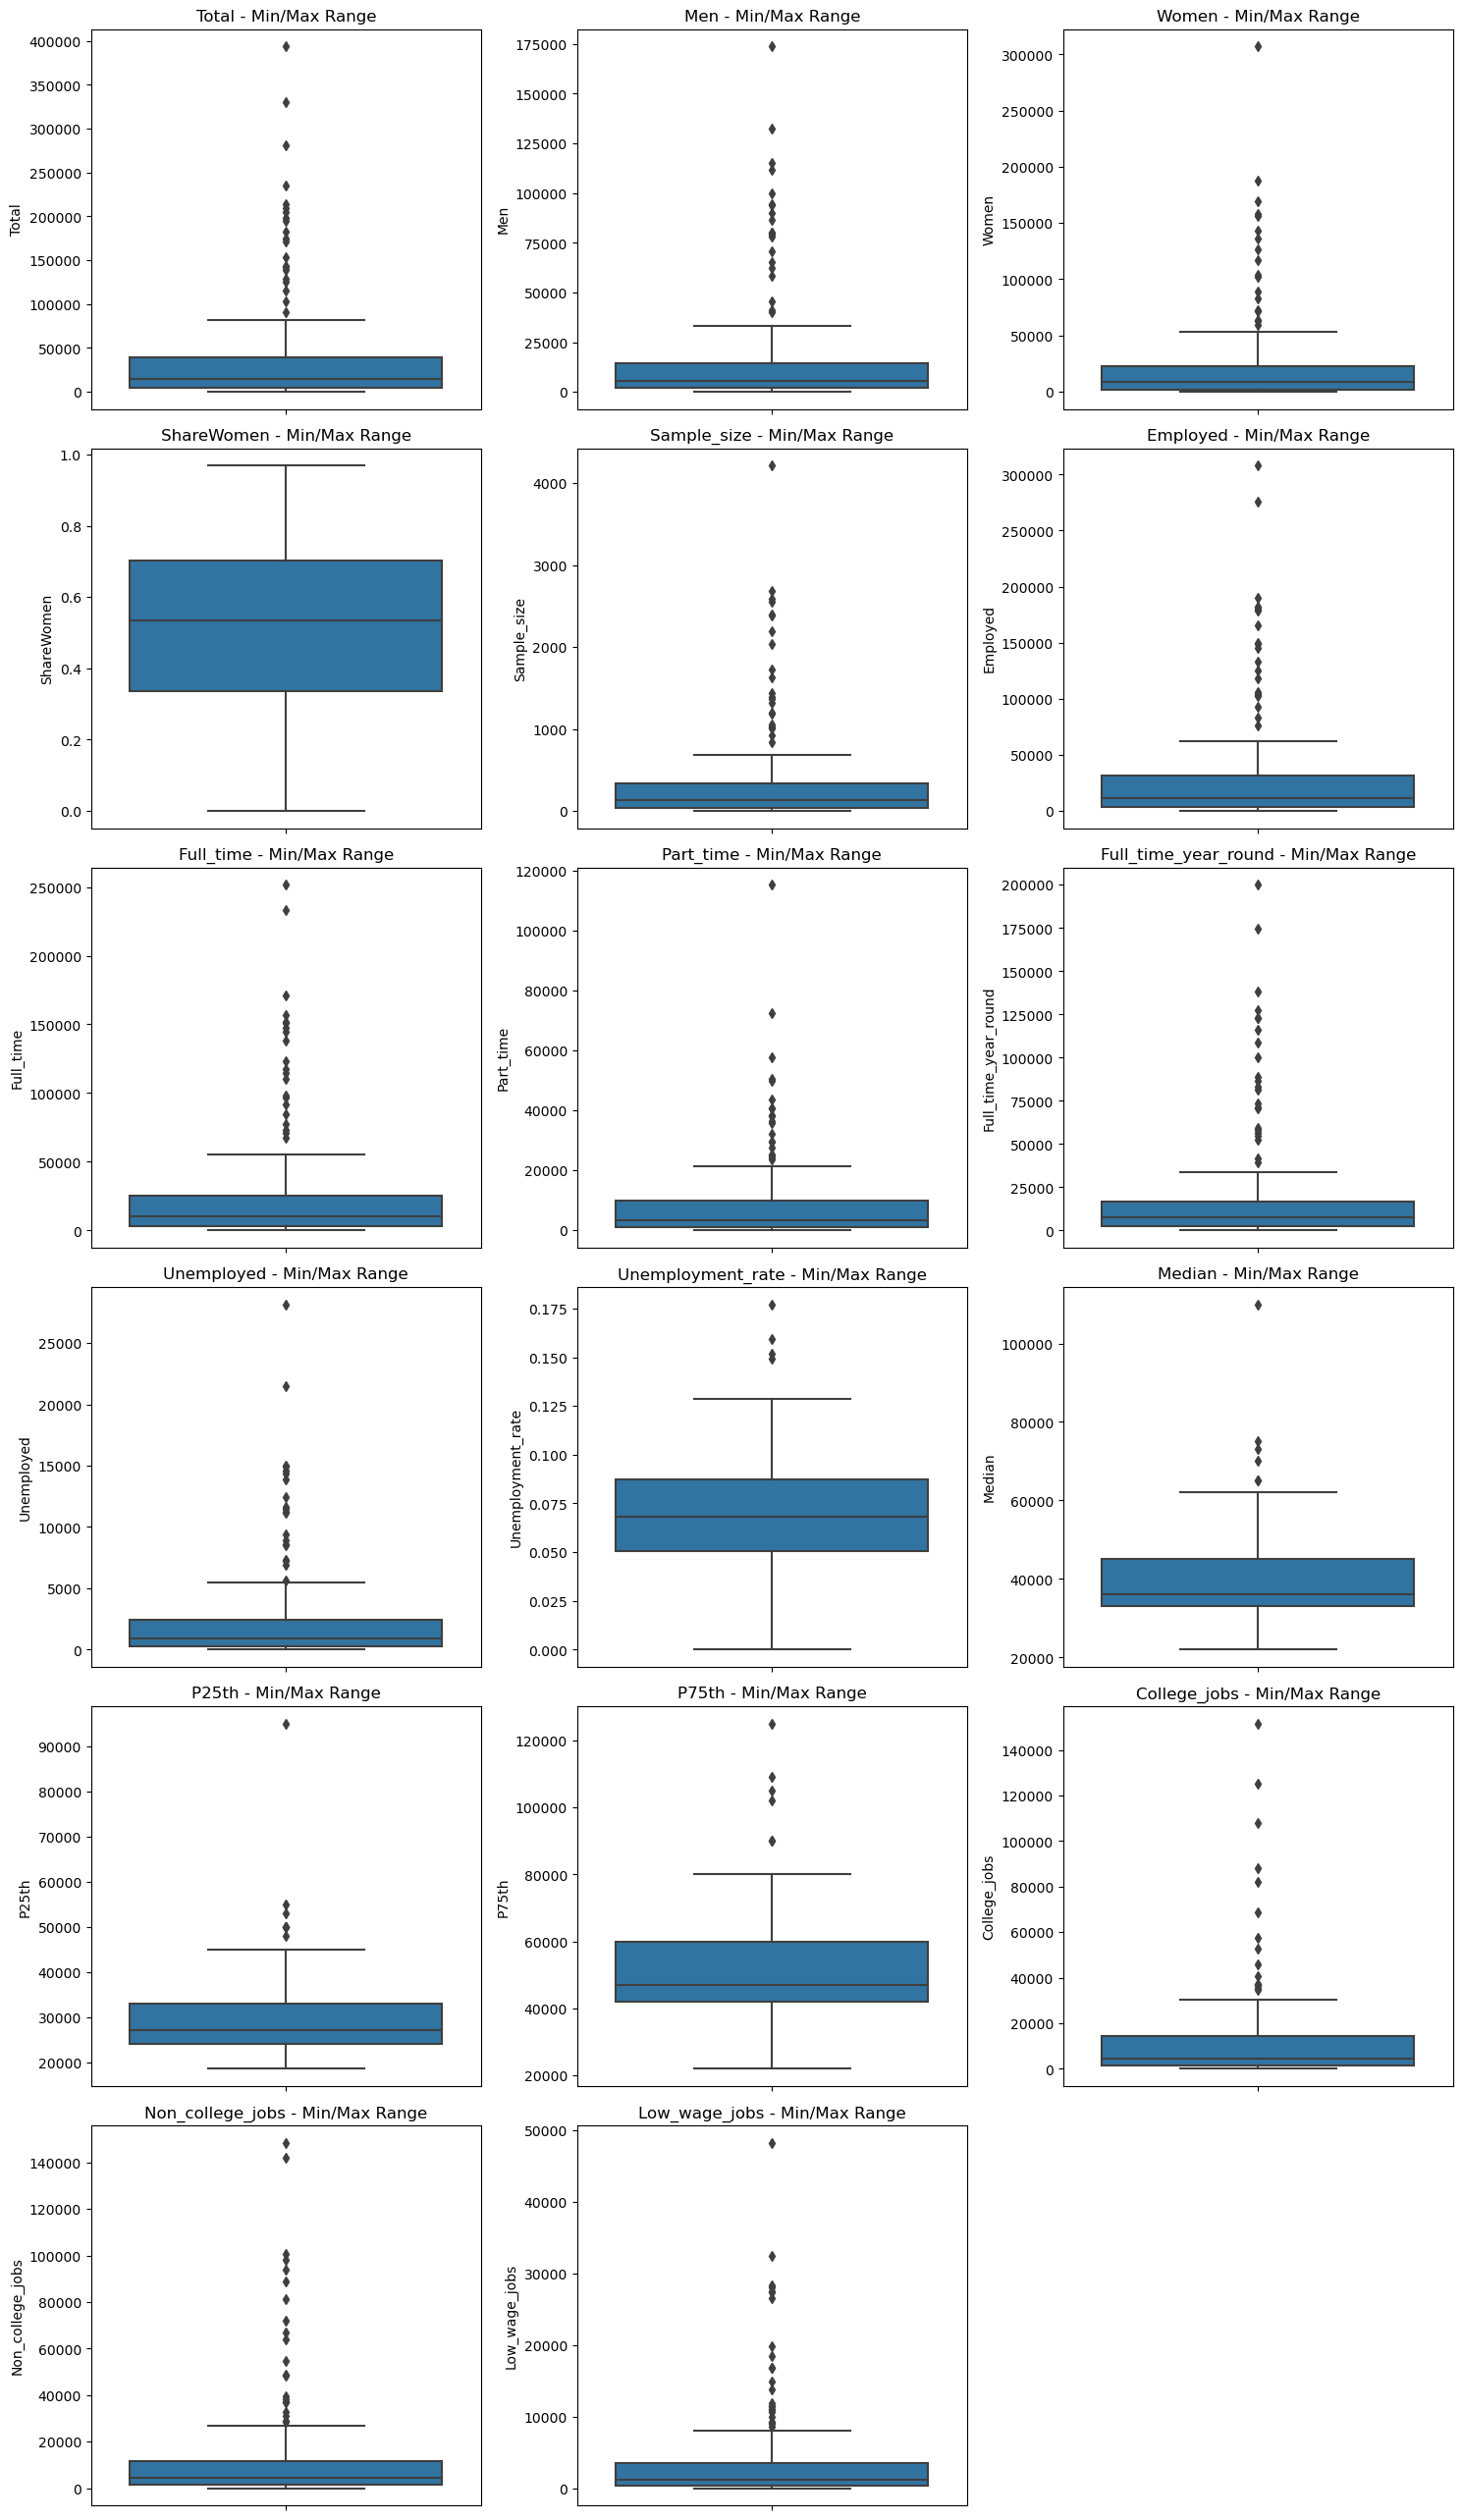

In [57]:
#visualizations
#boxplot for min/max
plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Min/Max Range')

plt.tight_layout()
plt.show()

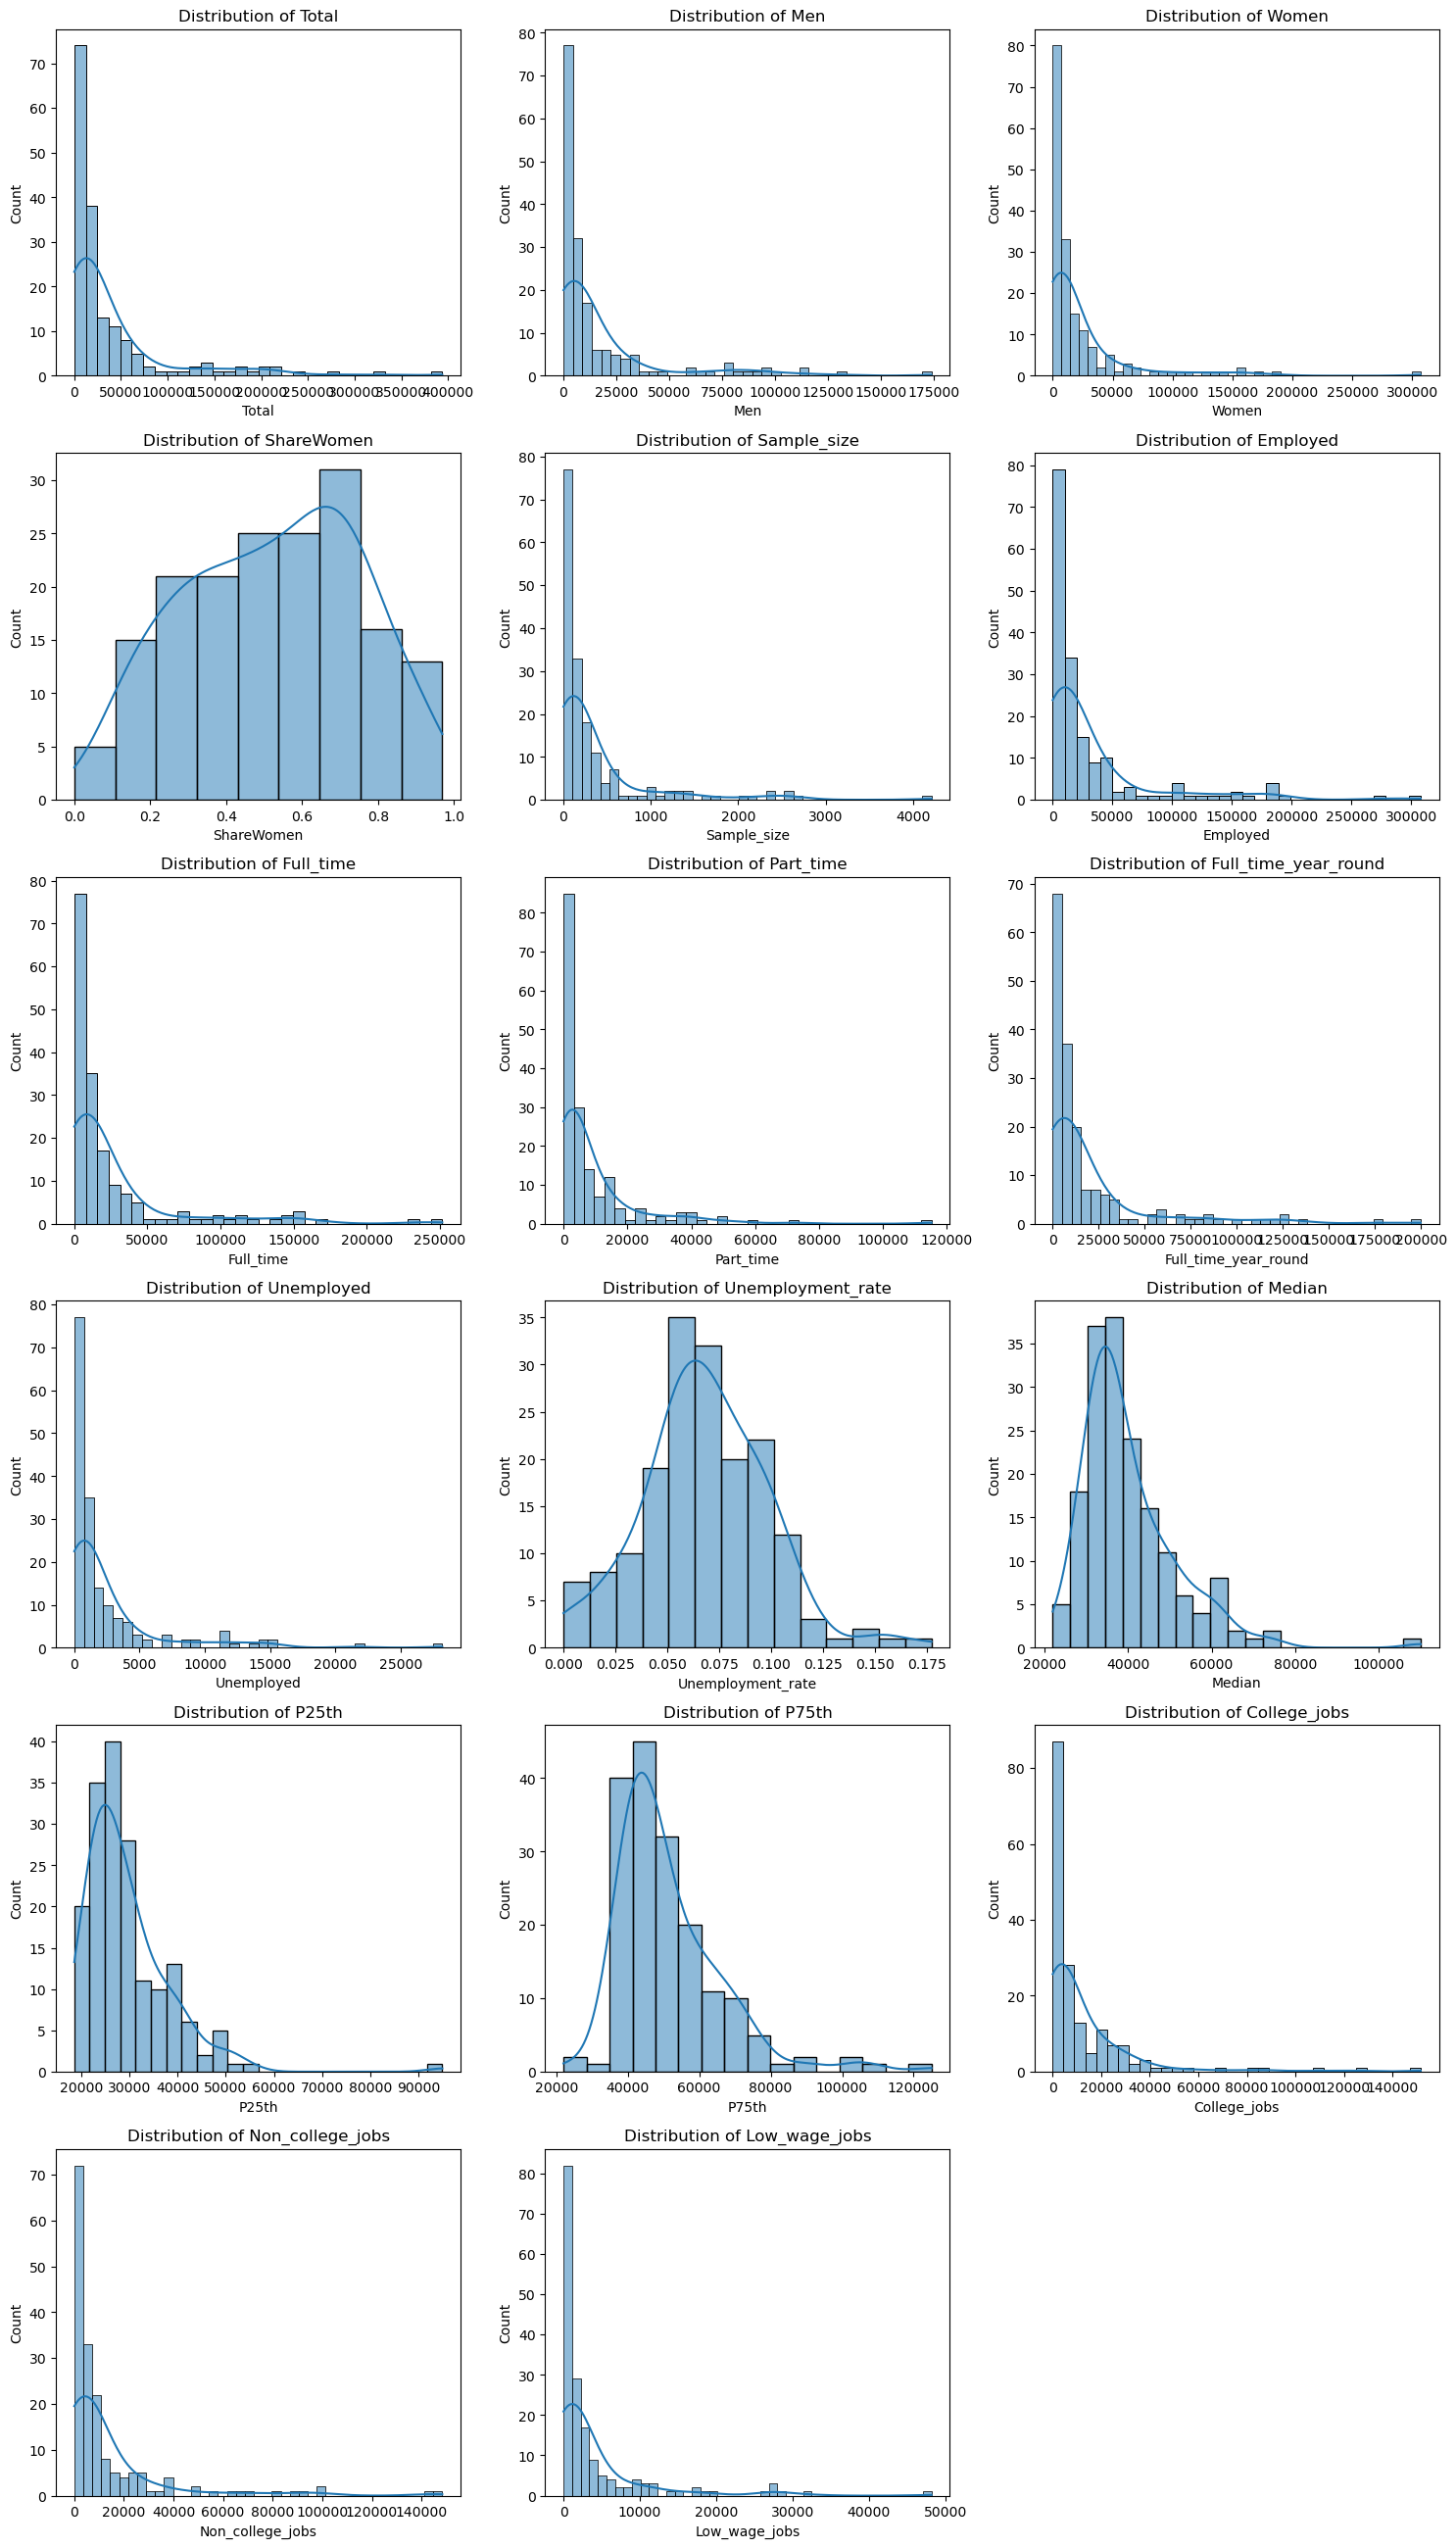

In [56]:
#histogram for distributions
plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

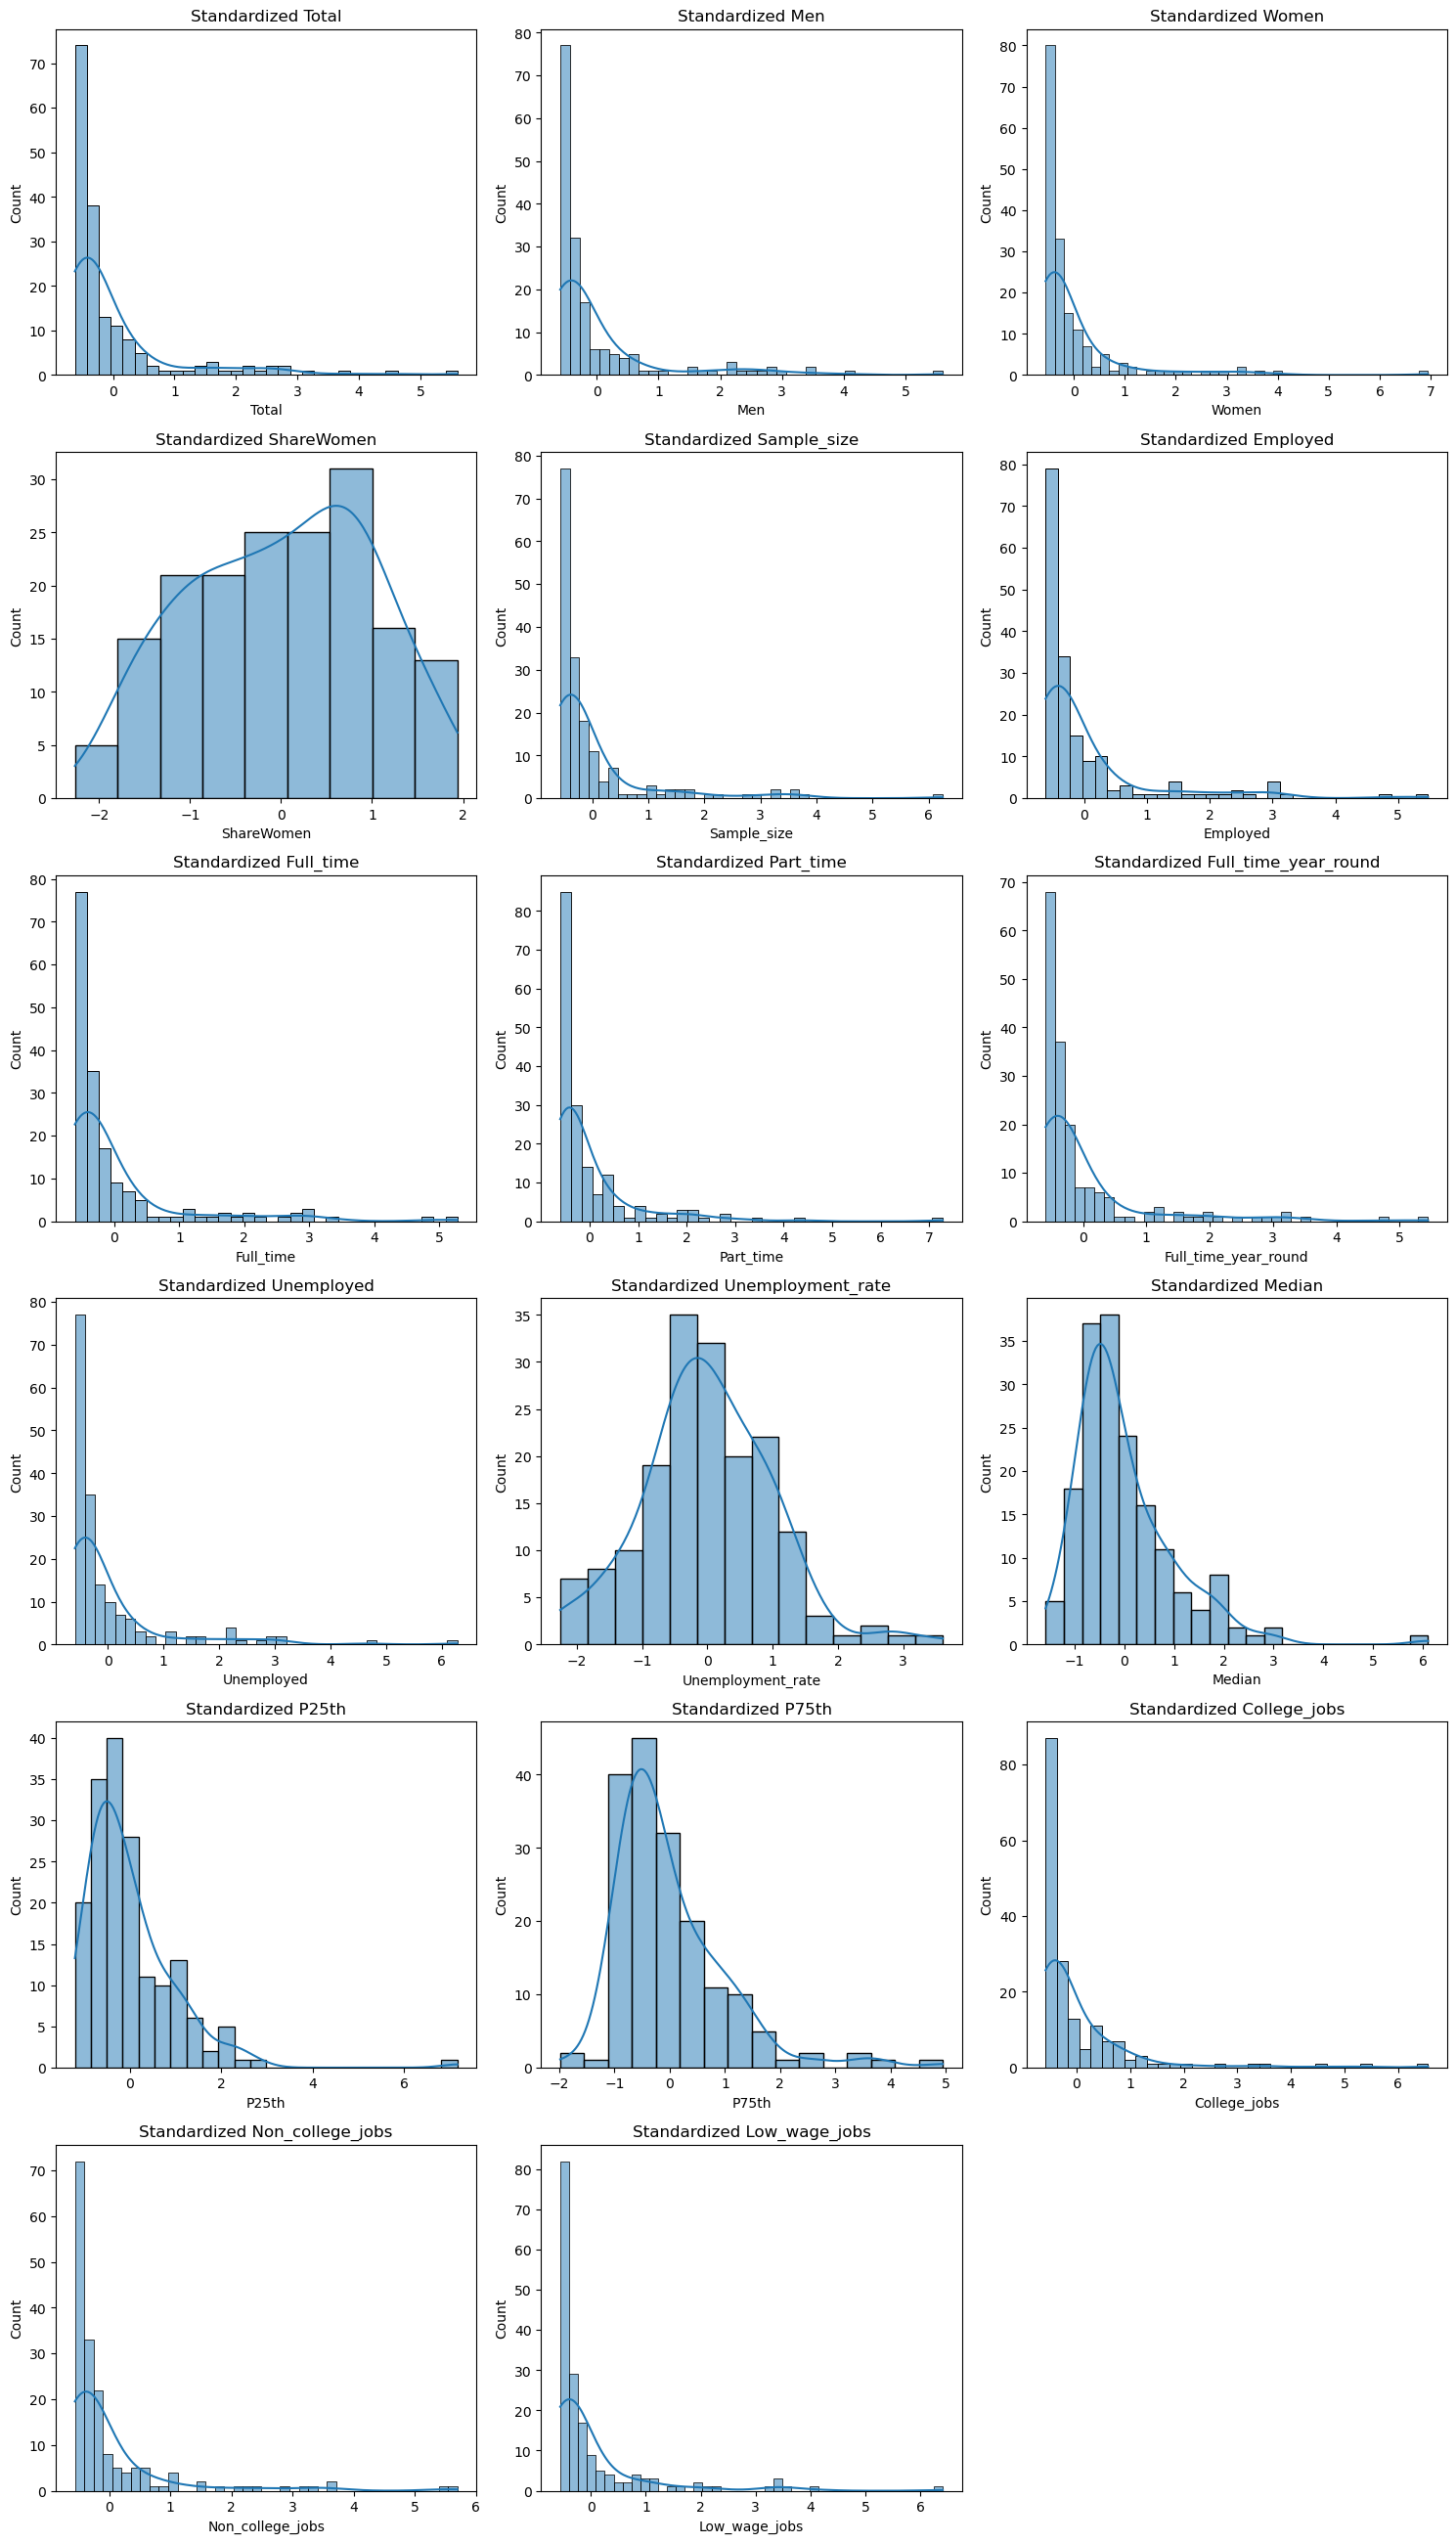

In [58]:
#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f'Standardized {col}')

plt.tight_layout()
plt.show()

### Justifying Standardization

I believe it made sense to standardize here - as we can see in the dataset, several variables in this dataset have vastly different ranges, and the difference can cause issues with machine learning models. This way, when making predictions, each variable will contribute equally.

## Feature Selection

Out of this set, I plan to pull a few columns to focus on. These are as follows in no particular order:
- Total: Total number of people with a given major
- Men: Male graduates
- Women: Female graduates
- Employed: Number employed
- Full_time: Employed 35 hours or more
- Part_time: Employed less than 35 hours
- Full_time_year_round: Employed at least 50 weeks and at least 35 hours
- Unemployed: Number unemployed
- Median: Median earnings of full-time, year-round workers

The focus is on employment and wage-related metrics, so variables like the ones above are directly relevant to understanding employment patterns. Additionally, Men and Women give insights into the gender distribution of jobs, to see if certain majors are more heavily dominanted by men or women respectively.

#### Descriptive Stats

In [64]:
features = [
    'Total',
    'Men',
    'Women',
    'Employed',
    'Full_time',
    'Part_time',
    'Full_time_year_round',
    'Unemployed',
    'Median'
]

descriptive_stats = df[features].describe()
print(descriptive_stats)

               Total            Men          Women       Employed  \
count     172.000000     172.000000     172.000000     173.000000   
mean    39370.081395   16723.406977   22646.674419   31192.763006   
std     63483.491009   28122.433474   41057.330740   50675.002241   
min       124.000000     119.000000       0.000000       0.000000   
25%      4549.750000    2177.500000    1778.250000    3608.000000   
50%     15104.000000    5434.000000    8386.500000   11797.000000   
75%     38909.750000   14631.000000   22553.750000   31433.000000   
max    393735.000000  173809.000000  307087.000000  307933.000000   

           Full_time      Part_time  Full_time_year_round    Unemployed  \
count     173.000000     173.000000            173.000000    173.000000   
mean    26029.306358    8832.398844          19694.427746   2416.329480   
std     42869.655092   14648.179473          33160.941514   4112.803148   
min       111.000000       0.000000            111.000000      0.000000   
25%

Employment will be the main response variable, and the rest will be predictors.